In [62]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [63]:
np.random.seed(0)

In [64]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #importing Data

In [65]:
assert(X_train.shape[0] ==y_train.shape[0]), "The Number of images is not equal to no of labels"
assert(X_test.shape[0] ==y_test.shape[0]), "The Number of images is not equal to no of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of images are not 28*28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of images are not 28*28"

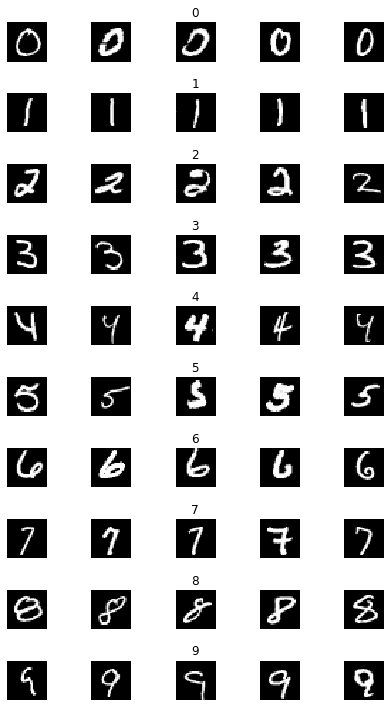

In [66]:
num_of_samples = []
cols = 5
num_classes = 10

fig,axs = plt.subplots(nrows = num_classes, ncols = cols, figsize =(6,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)), : :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i ==2:
            axs[j][i].set_title(str(j))

In [67]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
#Normalizing Data
X_train = X_train/255
X_test = X_test/255

In [68]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [69]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = num_pixels, activation = "relu"))
    model.add(Dense(30, activation = "relu"))
    model.add(Dense(10, activation = "relu"))
    model.add(Dense(num_classes, activation = "softmax"))
    model.compile(Adam(lr =0.01), loss='categorical_crossentropy', metrics = ['accuracy'])
    return model

In [70]:
model = create_model()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_11 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [71]:
history = model.fit(X_train, y_train, validation_split= 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.5198 - accuracy: 0.8377 - val_loss: 0.2919 - val_accuracy: 0.9112
Epoch 2/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.2786 - accuracy: 0.9177 - val_loss: 0.2135 - val_accuracy: 0.9378
Epoch 3/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2466 - accuracy: 0.9270 - val_loss: 0.2157 - val_accuracy: 0.9373
Epoch 4/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2270 - accuracy: 0.9324 - val_loss: 0.1914 - val_accuracy: 0.9427
Epoch 5/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.2113 - accuracy: 0.9376 - val_loss: 0.1801 - val_accuracy: 0.9475
Epoch 6/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2015 - accuracy: 0.9397 - val_loss: 0.1815 - val_accuracy: 0.9435
Epoch 7/10
54000/54000 [==============================] - 1s 21us/ste

Text(0.5, 1.0, 'loss')

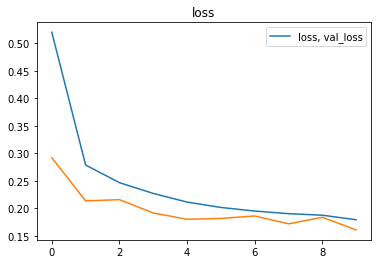

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss, val_loss'])
plt.title('loss')

Text(0.5, 1.0, 'acc')

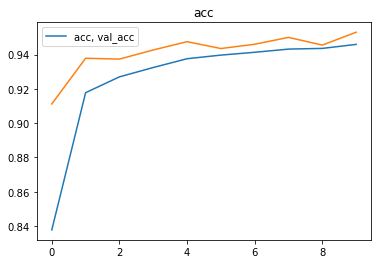

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc, val_acc'])
plt.title('acc')

In [74]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test score = ', score[0])
print('Test accuracy = ', score[1])

Test score =  0.2016512273205444
Test accuracy =  0.9435999989509583


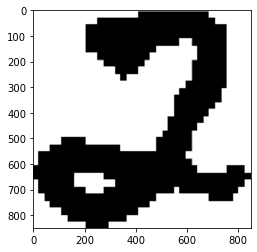

In [75]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

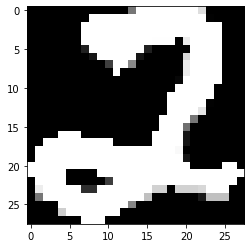

In [76]:
import cv2 

img_array = np.asarray(img) #input data is converted into an array
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image,  cmap=plt.get_cmap("gray"))

In [77]:
image = image/255
image = image.reshape(1, 784)


In [78]:
prediction = model.predict_classes(image)
print("Prediction:", str(prediction)) #The prediction is not very accurate from observation. Hence a Convolutional Neural Network is used to better classify img data.

Prediction: [5]
